In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Eksplorasi Data

In [2]:
data=pd.read_csv('/content/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')
data

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.80,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.40,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.40,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.10,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.00,70.0,79.7,132,63,31,105,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,...,0,5.30,73.0,122.6,127,74,24,102,0,9
487,1,45,0,0,0,0,1,0,1,0,...,0,5.90,67.0,110.3,150,112,33,94,0,8
488,1,44,1,0,0,0,0,1,1,1,...,0,6.41,66.3,111.6,126,83,35,0,0,0
489,1,41,0,0,1,1,1,1,0,1,...,1,4.00,93.0,87.6,119,66,22,35,1,3


In [3]:
# Menghapus kolom yang tidak diperlukan
data.drop(['TIME_YEAR','TimeToEventMonths'],inplace=True,axis=1)
data

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
0,0,64,0,0,0,0,1,1,1,1,0,1,0,4.80,59.0,93.3,144,87,40,0
1,0,52,0,0,0,0,1,1,1,0,0,1,0,6.40,52.0,105.8,148,91,45,0
2,0,56,0,0,0,0,1,1,1,1,0,1,0,6.40,57.0,99.8,149,86,41,0
3,0,58,0,0,0,0,0,1,1,1,0,0,0,5.10,65.0,90.3,116,68,32,0
4,0,63,1,0,0,0,1,1,1,1,1,1,1,5.00,70.0,79.7,132,63,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,0,0,0,5.30,73.0,122.6,127,74,24,0
487,1,45,0,0,0,0,1,0,1,0,0,0,0,5.90,67.0,110.3,150,112,33,0
488,1,44,1,0,0,0,0,1,1,1,1,0,0,6.41,66.3,111.6,126,83,35,0
489,1,41,0,0,1,1,1,1,0,1,0,1,1,4.00,93.0,87.6,119,66,22,1


In [4]:
# Menampilkan informasi tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

In [5]:
# Menampilkan ringkasan statistik dataset
data.describe()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,0.551935,0.327902,0.617108,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,0.114053
std,0.500426,13.821282,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,0.497803,0.469928,0.486588,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,0.318200
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,0.000000
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,0.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,1.000000


In [6]:
# Menampilkan jumlah nilai yang hilang (missing values) dalam dataset
data.isna().sum()

Sex                    0
AgeBaseline            0
HistoryDiabetes        0
HistoryCHD             0
HistoryVascular        0
HistorySmoking         0
HistoryHTN             0
HistoryDLD             0
HistoryObesity         0
DLDmeds                0
DMmeds                 0
HTNmeds                0
ACEIARB                0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
EventCKD35             0
dtype: int64

In [7]:
# Menampilkan jumlah duplikat dalam dataset
data.duplicated().sum()

0

In [8]:
# Menampilkan jumlah nilai pada kolom 'EventCKD35'
data['EventCKD35'].value_counts()

0    435
1     56
Name: EventCKD35, dtype: int64

# Splitting data between categoric values and numeric values

In [9]:
num_col=['AgeBaseline','CholesterolBaseline','CreatinineBaseline','eGFRBaseline','sBPBaseline','dBPBaseline','BMIBaseline']
cat_col=list(set(data.columns)-set(num_col))

In [10]:
# Menentukan kolom numerik
num_col

['AgeBaseline',
 'CholesterolBaseline',
 'CreatinineBaseline',
 'eGFRBaseline',
 'sBPBaseline',
 'dBPBaseline',
 'BMIBaseline']

In [11]:
# Menentukan kolom kategorikal
cat_col

['DMmeds',
 'ACEIARB',
 'HistoryObesity',
 'HistoryDiabetes',
 'EventCKD35',
 'HistoryCHD',
 'DLDmeds',
 'HistoryVascular',
 'Sex',
 'HistoryHTN ',
 'HistoryDLD',
 'HistorySmoking',
 'HTNmeds']

In [12]:
# Memisahkan kolom numerik dan kategorikal dalam dataset
num_features=data.drop(cat_col,axis=1)
cat_features=data.drop(num_col,axis=1)
cat_features.drop(['EventCKD35'],axis=1,inplace=True)

In [13]:
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144,87,40
1,52,6.40,52.0,105.8,148,91,45
2,56,6.40,57.0,99.8,149,86,41
3,58,5.10,65.0,90.3,116,68,32
4,63,5.00,70.0,79.7,132,63,31
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127,74,24
487,45,5.90,67.0,110.3,150,112,33
488,44,6.41,66.3,111.6,126,83,35
489,41,4.00,93.0,87.6,119,66,22


In [14]:
cat_features

,Sex,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB
0,0,0,0,0,0,1,1,1,1,0,1,0
1,0,0,0,0,0,1,1,1,0,0,1,0
2,0,0,0,0,0,1,1,1,1,0,1,0
3,0,0,0,0,0,0,1,1,1,0,0,0
4,0,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,0,0,0,0,0,0,0,0,0,0,0
487,1,0,0,0,0,1,0,1,0,0,0,0
488,1,1,0,0,0,0,1,1,1,1,0,0
489,1,0,0,1,1,1,1,0,1,0,1,1


In [15]:
target=data['EventCKD35']
target

0      0
1      0
2      0
3      0
4      0
      ..
486    0
487    0
488    0
489    1
490    0
Name: EventCKD35, Length: 491, dtype: int64

# Visualisasi Data

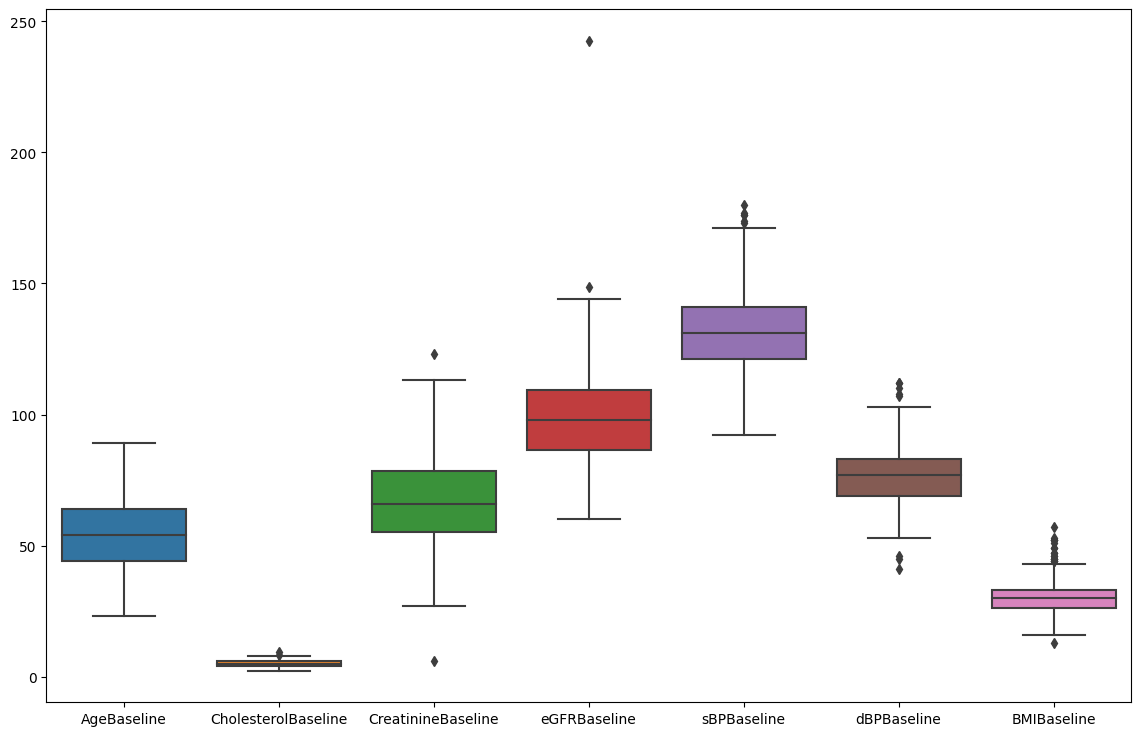

In [16]:
# Box plot
plt.figure(figsize=(14,9))
sns.boxplot(data=num_features)
plt.show()

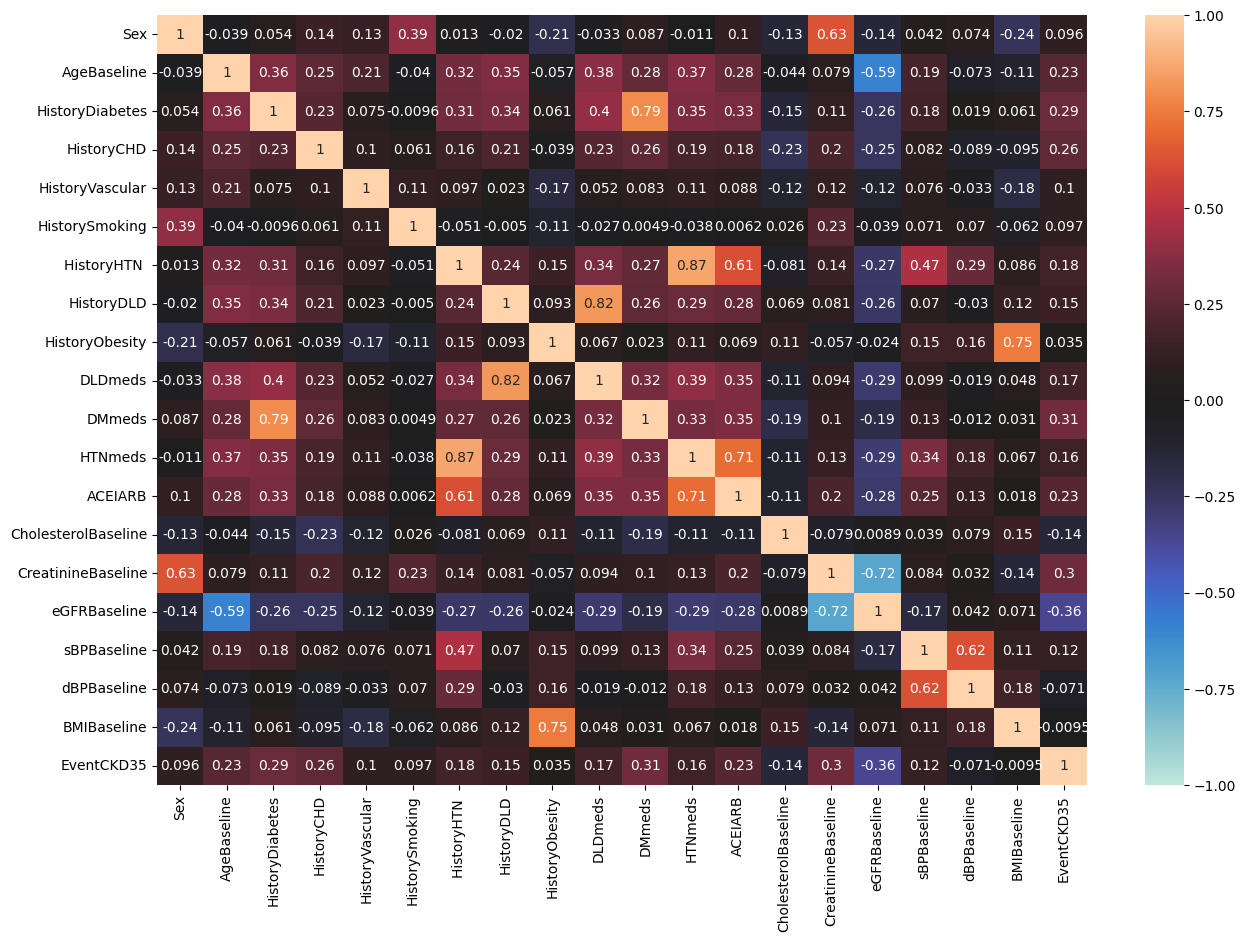

In [17]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

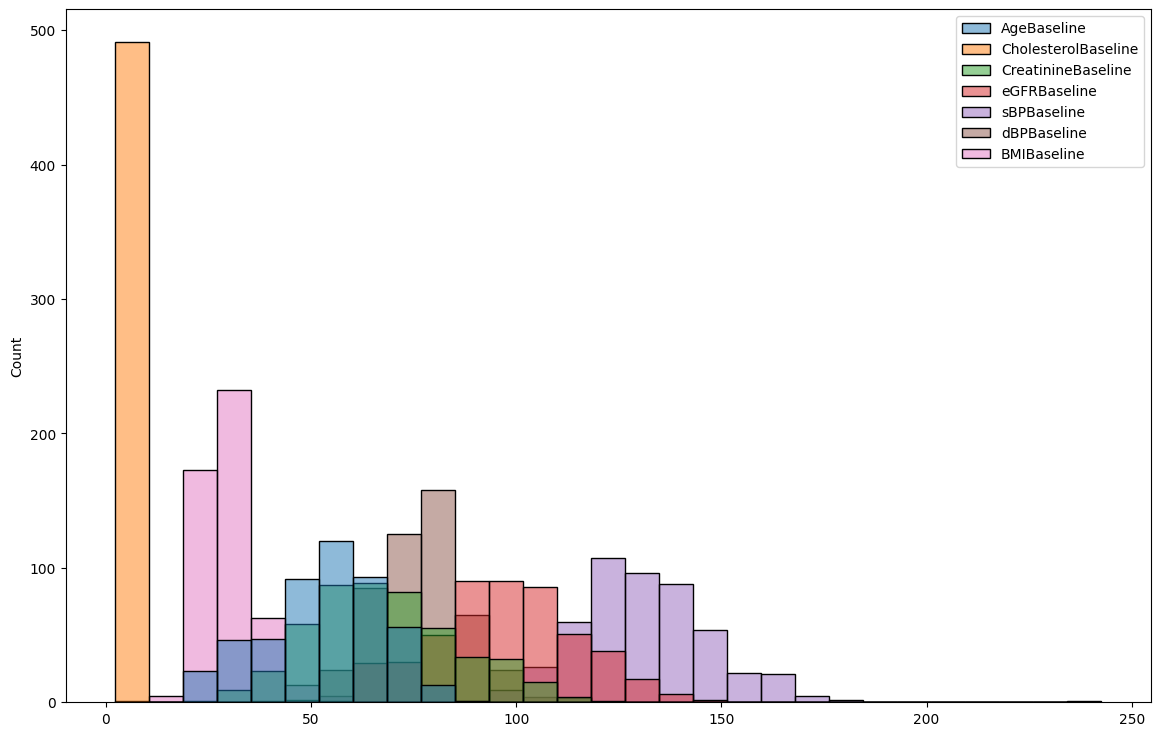

In [18]:
# Histogram 
plt.figure(figsize=(14,9))
sns.histplot(data=num_features)
plt.show()

# Handling Outlier /Jangan di run untuk sementara

In [ ]:
#define IQR to remove data outlier
Q1 = num_features.quantile(q=.25)
Q3 = num_features.quantile(q=.75)
IQR = Q3 - Q1
print(IQR)

AgeBaseline            20.00
CholesterolBaseline     1.57
CreatinineBaseline     23.50
eGFRBaseline           23.10
sBPBaseline            20.00
dBPBaseline            14.00
BMIBaseline             7.00
dtype: float64


In [ ]:
# Menghapus outlier berdasarkan IQR
num_features = num_features[~((num_features<(Q1-1.5*IQR)) | (num_features>(Q3+1.5*IQR)))]
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144.0,87.0,40.0
1,52,6.40,52.0,105.8,148.0,91.0,NaN
2,56,6.40,57.0,99.8,149.0,86.0,41.0
3,58,5.10,65.0,90.3,116.0,68.0,32.0
4,63,5.00,70.0,79.7,132.0,63.0,31.0
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127.0,74.0,24.0
487,45,5.90,67.0,110.3,150.0,NaN,33.0
488,44,6.41,66.3,111.6,126.0,83.0,35.0
489,41,4.00,93.0,87.6,119.0,66.0,22.0


In [ ]:
num_features.isna().sum()

AgeBaseline             0
CholesterolBaseline     2
CreatinineBaseline      2
eGFRBaseline            2
sBPBaseline             6
dBPBaseline             8
BMIBaseline            19
dtype: int64

In [ ]:
# Mengisi missing values dengan interpolasi linear
num_features.interpolate(method='linear',axis=0,inplace=True)
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144.0,87.0,40.0
1,52,6.40,52.0,105.8,148.0,91.0,40.5
2,56,6.40,57.0,99.8,149.0,86.0,41.0
3,58,5.10,65.0,90.3,116.0,68.0,32.0
4,63,5.00,70.0,79.7,132.0,63.0,31.0
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127.0,74.0,24.0
487,45,5.90,67.0,110.3,150.0,78.5,33.0
488,44,6.41,66.3,111.6,126.0,83.0,35.0
489,41,4.00,93.0,87.6,119.0,66.0,22.0


In [ ]:
num_features.isna().sum()

AgeBaseline            0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
dtype: int64

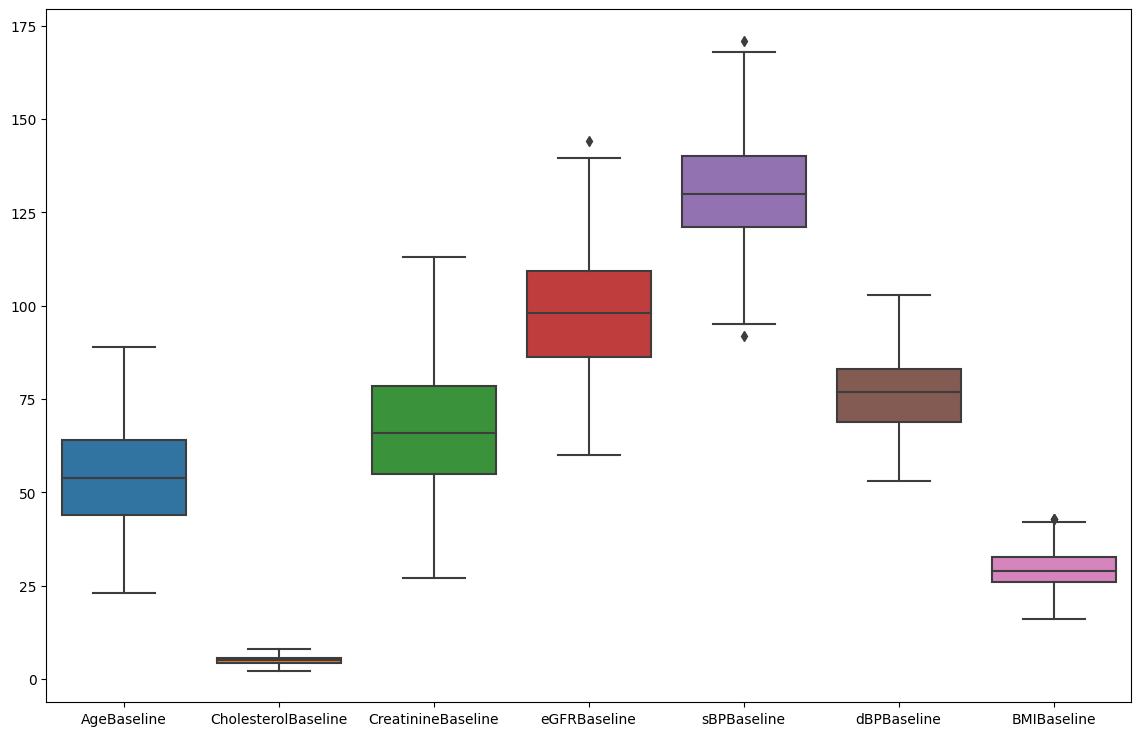

In [ ]:
# Menampilkan box plot setelah mengatasi outlier
plt.figure(figsize=(14,9))
sns.boxplot(data=num_features)
plt.show()

# Feature Selection Univariate /Pilih salah satu

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2

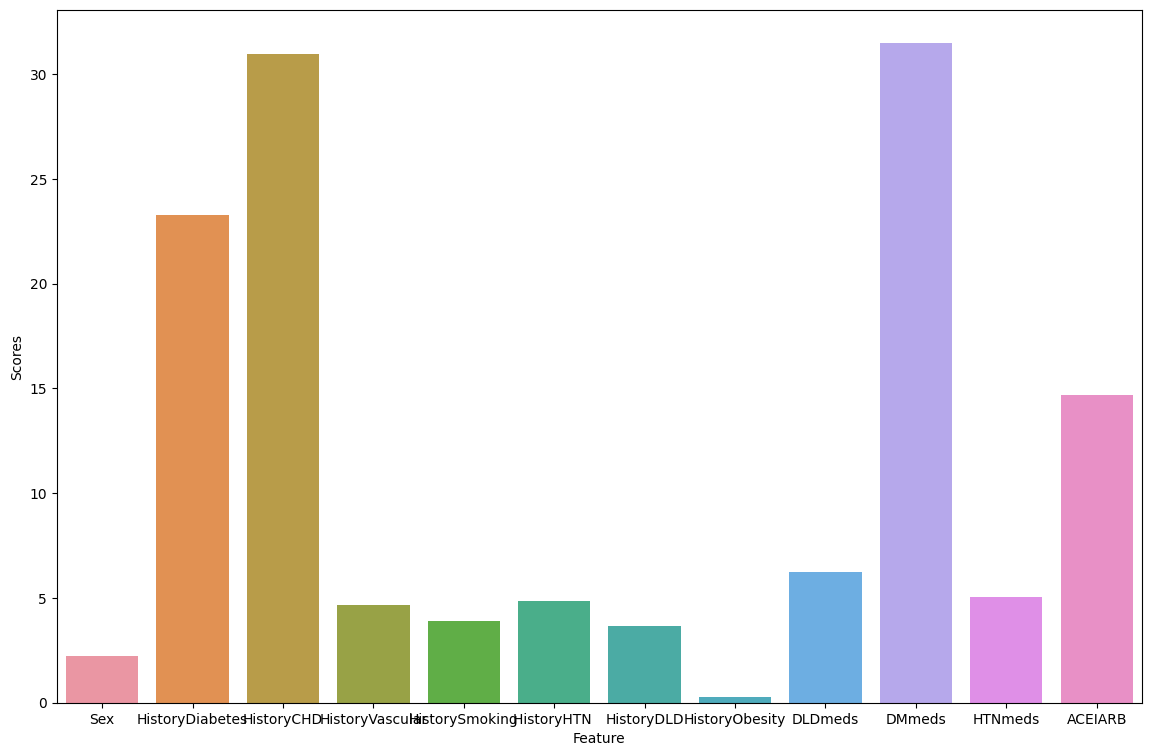

In [20]:
# Seleksi fitur menggunakan SelectKBest dan chi-square
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit(cat_features, target)
dfscores=pd.DataFrame(X_new.scores_)
dfcolumns=pd.DataFrame(cat_features.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Scores']
# Visualisasi skor fitur
plt.figure(figsize=(14,9))
sns.barplot(x=featureScores['Feature'],y=featureScores['Scores'])
plt.show()

In [21]:
# Seleksi fitur berdasarkan skor chi-square yang lebih besar dari 5
index_list=list(dfscores.index)
good_col=[]
for i in index_list:
    if dfscores[0][i] >5:
        good_col.append(dfscores[0][i])
len(good_col)

6

In [22]:
# Seleksi fitur menggunakan SelectKBest dan ANOVA
fs=SelectKBest(score_func=chi2,k=6)
X_new=fs.fit_transform(cat_features,target)
selected_num_features = cat_features.columns[fs.get_support()]
cat_features=cat_features[selected_num_features]
cat_features

,HistoryDiabetes,HistoryCHD,DLDmeds,DMmeds,HTNmeds,ACEIARB
0,0,0,1,0,1,0
1,0,0,0,0,1,0
2,0,0,1,0,1,0
3,0,0,1,0,0,0
4,1,0,1,1,1,1
...,...,...,...,...,...,...
486,0,0,0,0,0,0
487,0,0,0,0,0,0
488,1,0,1,1,0,0
489,0,0,1,0,1,1


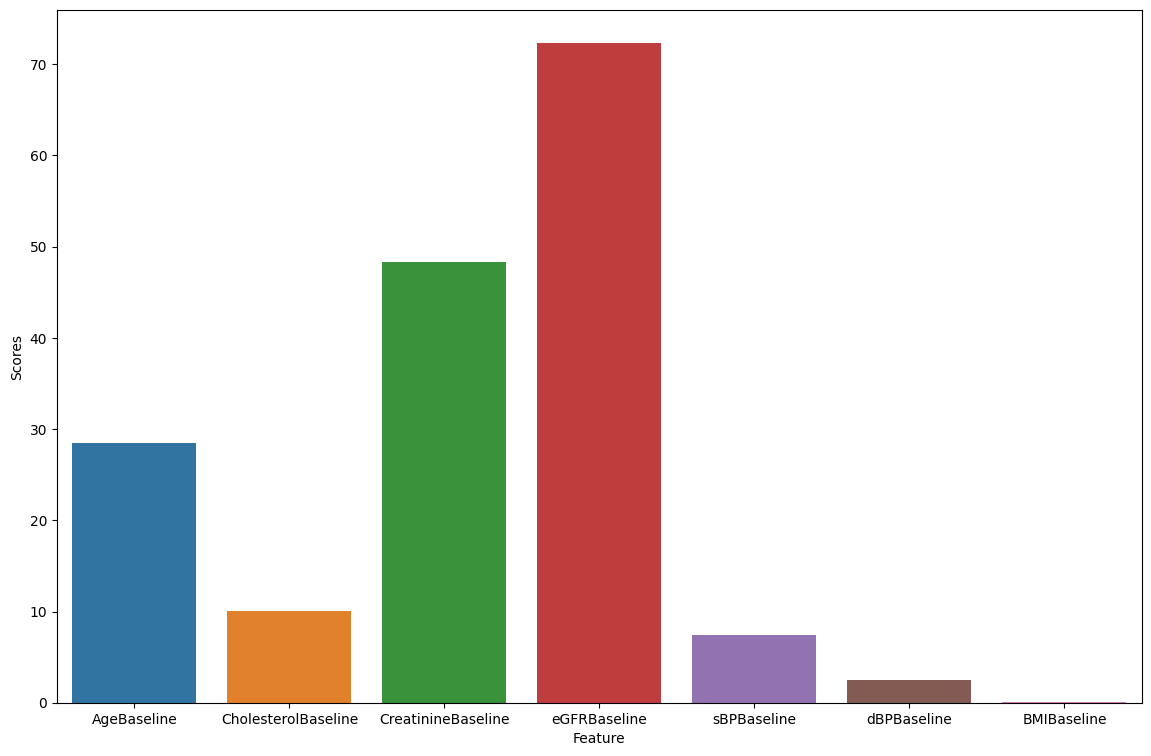

In [23]:
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit(num_features, target)
dfscores=pd.DataFrame(X_new.scores_)
dfcolumns=pd.DataFrame(num_features.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Scores']
# Visualisasi skor fitur
plt.figure(figsize=(14,9))
sns.barplot(x=featureScores['Feature'],y=featureScores['Scores'])
plt.show()

In [24]:
# Seleksi fitur berdasarkan skor ANOVA yang lebih besar dari 10
index_list=list(dfscores.index)
good_col=[]
for i in index_list:
    if dfscores[0][i] >10:
        good_col.append(dfscores[0][i])
len(good_col)

4

In [25]:
# Seleksi fitur numerik yang memiliki skor ANOVA yang lebih besar dari 10
fs=SelectKBest(score_func=f_classif,k=4)
X_new=fs.fit_transform(num_features,target)
selected_num_features = num_features.columns[fs.get_support()]
num_features=num_features[selected_num_features]
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline
0,64,4.80,59.0,93.3
1,52,6.40,52.0,105.8
2,56,6.40,57.0,99.8
3,58,5.10,65.0,90.3
4,63,5.00,70.0,79.7
...,...,...,...,...
486,25,5.30,73.0,122.6
487,45,5.90,67.0,110.3
488,44,6.41,66.3,111.6
489,41,4.00,93.0,87.6


In [26]:
# Menggabungkan fitur numerik dan kategorikal yang telah dipilih
data=pd.concat([num_features,cat_features,target],axis=1)
data

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,HistoryDiabetes,HistoryCHD,DLDmeds,DMmeds,HTNmeds,ACEIARB,EventCKD35
0,64,4.80,59.0,93.3,0,0,1,0,1,0,0
1,52,6.40,52.0,105.8,0,0,0,0,1,0,0
2,56,6.40,57.0,99.8,0,0,1,0,1,0,0
3,58,5.10,65.0,90.3,0,0,1,0,0,0,0
4,63,5.00,70.0,79.7,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,0,0,0,0,0,0,0
487,45,5.90,67.0,110.3,0,0,0,0,0,0,0
488,44,6.41,66.3,111.6,1,0,1,1,0,0,0
489,41,4.00,93.0,87.6,0,0,1,0,1,1,1


# Feature selection based on feature importance /Pilih salah satu

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42) 

In [ ]:
data=pd.concat([num_features,cat_features,target],axis=1)
data

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,Sex,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,EventCKD35
0,64,4.80,59.0,93.3,144,87,40,0,0,0,0,0,1,1,1,1,0,1,0,0
1,52,6.40,52.0,105.8,148,91,45,0,0,0,0,0,1,1,1,0,0,1,0,0
2,56,6.40,57.0,99.8,149,86,41,0,0,0,0,0,1,1,1,1,0,1,0,0
3,58,5.10,65.0,90.3,116,68,32,0,0,0,0,0,0,1,1,1,0,0,0,0
4,63,5.00,70.0,79.7,132,63,31,0,1,0,0,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127,74,24,1,0,0,0,0,0,0,0,0,0,0,0,0
487,45,5.90,67.0,110.3,150,112,33,1,0,0,0,0,1,0,1,0,0,0,0,0
488,44,6.41,66.3,111.6,126,83,35,1,1,0,0,0,0,1,1,1,1,0,0,0
489,41,4.00,93.0,87.6,119,66,22,1,0,0,1,1,1,1,0,1,0,1,1,1


In [ ]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [ ]:
log_regr=LogisticRegression(max_iter=400,solver='liblinear')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i in range(1,4):
    print('test_size: ',0.1*i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1*i, random_state=42)
    X_train,y_train=sm.fit_resample(X_train, y_train)
    lr_score = cross_val_score(log_regr, X_train, y_train, cv=kfold, scoring='f1_weighted').mean()
    dt_score = cross_val_score(dt, X_train, y_train, cv=kfold, scoring='f1_weighted').mean()
    rf_score = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='f1_weighted').mean()
    print('lr score', lr_score)
    print('dt score', dt_score)
    print('rf score', rf_score)

test_size:  0.1
lr score 0.8297122892300359
dt score 0.8553377433048583
rf score 0.9423614743833439
test_size:  0.2
lr score 0.8644896298908445
dt score 0.8746065273813212
rf score 0.9395740272749581
test_size:  0.30000000000000004
lr score 0.8554380920933553
dt score 0.8964359025631514
rf score 0.932610591644924


In [ ]:
selector=SelectFromModel(estimator=rf,max_features=9).fit(X,y)

In [ ]:
selected_features = X.columns[selector.get_support()]
X=X[selected_features]
X

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144,87,40
1,52,6.40,52.0,105.8,148,91,45
2,56,6.40,57.0,99.8,149,86,41
3,58,5.10,65.0,90.3,116,68,32
4,63,5.00,70.0,79.7,132,63,31
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127,74,24
487,45,5.90,67.0,110.3,150,112,33
488,44,6.41,66.3,111.6,126,83,35
489,41,4.00,93.0,87.6,119,66,22


In [ ]:
data=pd.concat([X,y],axis=1)
data

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
0,64,4.80,59.0,93.3,144,87,40,0
1,52,6.40,52.0,105.8,148,91,45,0
2,56,6.40,57.0,99.8,149,86,41,0
3,58,5.10,65.0,90.3,116,68,32,0
4,63,5.00,70.0,79.7,132,63,31,0
...,...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127,74,24,0
487,45,5.90,67.0,110.3,150,112,33,0
488,44,6.41,66.3,111.6,126,83,35,0
489,41,4.00,93.0,87.6,119,66,22,1


#Scaling Data

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [28]:
# Inisialisasi MinMaxScaler
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [29]:
# Scaling data menggunakan MinMaxScaling
def MinMaxScaling(data, var):
    data_array=np.array(data[var]).reshape(-1,1)
    data[var] = scaler.fit_transform(data_array)
    return data

In [30]:
# Scaling setiap kolom dalam dataset
for column in X.columns:
    X=MinMaxScaling(X,column)
X

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,HistoryDiabetes,HistoryCHD,DLDmeds,DMmeds,HTNmeds,ACEIARB
0,0.621212,0.363508,0.452991,0.182366,0.0,0.0,1.0,0.0,1.0,0.0
1,0.439394,0.589816,0.393162,0.250821,0.0,0.0,0.0,0.0,1.0,0.0
2,0.500000,0.589816,0.435897,0.217963,0.0,0.0,1.0,0.0,1.0,0.0
3,0.530303,0.405941,0.504274,0.165936,0.0,0.0,1.0,0.0,0.0,0.0
4,0.606061,0.391796,0.547009,0.107886,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
486,0.030303,0.434229,0.572650,0.342826,0.0,0.0,0.0,0.0,0.0,0.0
487,0.333333,0.519095,0.521368,0.275465,0.0,0.0,0.0,0.0,0.0,0.0
488,0.318182,0.591231,0.515385,0.282585,1.0,0.0,1.0,1.0,0.0,0.0
489,0.272727,0.250354,0.743590,0.151150,0.0,0.0,1.0,0.0,1.0,1.0


In [31]:
# Menggabungkan fitur yang telah discaling dengan target
data=pd.concat([X,y],axis=1)
data

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,HistoryDiabetes,HistoryCHD,DLDmeds,DMmeds,HTNmeds,ACEIARB,EventCKD35
0,0.621212,0.363508,0.452991,0.182366,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.439394,0.589816,0.393162,0.250821,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.500000,0.589816,0.435897,0.217963,0.0,0.0,1.0,0.0,1.0,0.0,0
3,0.530303,0.405941,0.504274,0.165936,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.606061,0.391796,0.547009,0.107886,1.0,0.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
486,0.030303,0.434229,0.572650,0.342826,0.0,0.0,0.0,0.0,0.0,0.0,0
487,0.333333,0.519095,0.521368,0.275465,0.0,0.0,0.0,0.0,0.0,0.0,0
488,0.318182,0.591231,0.515385,0.282585,1.0,0.0,1.0,1.0,0.0,0.0,0
489,0.272727,0.250354,0.743590,0.151150,0.0,0.0,1.0,0.0,1.0,1.0,1


# Membangun model Neural Network

In [32]:
from tensorflow import keras

In [33]:
# Fungsi untuk membangun model MLP
def MLP_model(n_neurons_dense=(16,8),activation_dense='relu',n_layers_dense=2,activation_output='sigmoid',lr=1e-3):
    model=keras.models.Sequential()
    for i in range(n_layers_dense):
        if i==0:
            model.add(keras.layers.Dense(n_neurons_dense[i],activation=activation_dense,input_shape=(X.shape[1],)))
        else:
            model.add(keras.layers.Dense(n_neurons_dense[i],activation=activation_dense))
    model.add(keras.layers.Dense(1,activation=activation_output))
    opt = keras.optimizers.Adam(learning_rate=lr,weight_decay=1e-2)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [34]:
# Membangun model MLP
model=MLP_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


# Cross Validation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
# Inisialisasi SMOTE
sm=SMOTE(random_state=42) 

In [ ]:
# Fungsi untuk melakukan cross validation
def cross_validation(X,y,n_split=3,n_iter=5):
    score_list=[]
    score_mean_list=[]
    print('=== CROSS VALIDATE START ===')
    for i in range(n_split):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1*(i+1),random_state=42)
        X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)
        X_train,y_train=sm.fit_resample(X_train, y_train)
        score_each_split=[]
        for j in range(n_iter):
          model=None
          model=MLP_model()
          model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=0,batch_size=32)
          y_pred=model.predict(X_test)
          y_pred=np.round(y_pred)
          score=f1_score(y_test,y_pred,average='weighted')
          score_each_split.append(score)
          print('SPLIT {0} ITER {1} DONE!\n'.format(i+1, j+1))
        score_list.append(score_each_split)
        score_mean_list.append(np.mean(score_each_split))
    score_list=np.array(score_list)
    print('score: {}\n'.format(score_list))
    return score_list, score_mean_list

In [ ]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [ ]:
score,score_mean=cross_validation(X,y)

=== CROSS VALIDATE START ===
1/1 [==============================] - 0s 138ms/step
SPLIT 1 ITER 1 DONE!

1/1 [==============================] - 0s 63ms/step
SPLIT 1 ITER 2 DONE!

1/1 [==============================] - 0s 61ms/step
SPLIT 1 ITER 3 DONE!

1/1 [==============================] - 0s 64ms/step
SPLIT 1 ITER 4 DONE!



1/1 [==============================] - 0s 104ms/step
SPLIT 1 ITER 5 DONE!



2/2 [==============================] - 0s 14ms/step
SPLIT 2 ITER 1 DONE!

2/2 [==============================] - 0s 6ms/step
SPLIT 2 ITER 2 DONE!

2/2 [==============================] - 0s 5ms/step
SPLIT 2 ITER 3 DONE!

2/2 [==============================] - 0s 6ms/step
SPLIT 2 ITER 4 DONE!

2/2 [==============================] - 0s 6ms/step
SPLIT 2 ITER 5 DONE!

3/3 [==============================] - 0s 4ms/step
SPLIT 3 ITER 1 DONE!

3/3 [==============================] - 0s 4ms/step
SPLIT 3 ITER 2 DONE!

3/3 [==============================] - 0s 5ms/step
SPLIT 3 ITER 3 DONE!

3/3 [==============================] - 0s 4ms/step
SPLIT 3 ITER 4 DONE!

3/3 [==============================] - 0s 4ms/step
SPLIT 3 ITER 5 DONE!

score: [[0.80857143 0.752      0.75298246 0.7839627  0.75298246]
 [0.85263158 0.86775068 0.86775068 0.86775068 0.88291991]
 [0.83371392 0.82354255 0.81338481 0.78281507 0.81338481]]



In [ ]:
score_mean

[0.7700998089629669, 0.8677607052843255, 0.8133682332807373]

train size 0.8 memberikan score terbaik

# Hyperparameter Tuning

In [36]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import keras_tuner as kt

In [38]:
# Fungsi untuk membangun model MLP dengan hyperparameter tuning
def MLP_model_hp(hp):
  model = keras.models.Sequential()
  n_layers_dense=hp.Int('n_layer_dense',1,3,step=1)
  for i in range(n_layers_dense):
    n_neurons_dense = hp.Int(f"n_neurons_dense_{i}", min_value=8, max_value=128, step=8)
    dense_act = hp.Choice(f"act_dense_{i}", ['linear','relu','sigmoid'])
    dropout_rate=hp.Float(f'dropout_rate_{i}', 2e-1, 5e-1, sampling='log')
    if hp.Boolean(f'hidden_kernel_regularizer_{i}'):
      hidden_regularizer=keras.regularizers.L2(hp.Float(f'hidden_regularizer_{i}',1e-3,1e-1,sampling='log'))
    else:
      hidden_regularizer=None
    if i == 0:
      model.add(keras.layers.Dense(n_neurons_dense,activation=dense_act,input_shape=(X.shape[1],),kernel_regularizer=hidden_regularizer))
      if hp.Boolean(f'dropout_{i}'):
        model.add(keras.layers.Dropout(rate=dropout_rate))
    else:
      model.add(keras.layers.Dense(n_neurons_dense,activation=dense_act,kernel_regularizer=hidden_regularizer))
      if hp.Boolean(f'dropout_{i}'):
        model.add(keras.layers.Dropout(rate=dropout_rate))
  if hp.Boolean('output_kernel_regularizer'):
    output_regularizer=keras.regularizers.L2(hp.Float('output_regularizer',1e-3,1e-1,sampling='log'))
  else:
    output_regularizer=None
  model.add(keras.layers.Dense(1,activation='sigmoid',kernel_regularizer=output_regularizer))
  opt = keras.optimizers.Adam(
      learning_rate=hp.Float('lr', 1e-3, 1e-1, sampling='log')
      )
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [39]:
# Inisialisasi BayesianOptimization
tuner = kt.BayesianOptimization(
    hypermodel=MLP_model_hp,
    objective=kt.Objective('val_loss','min'),
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="/Data/Hasil",
    project_name="CKD",
)

In [40]:
# Menampilkan ringkasan ruang pencarian
tuner.search_space_summary()

Search space summary
Default search space size: 8
n_layer_dense (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
n_neurons_dense_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
act_dense_0 (Choice)
{'default': 'linear', 'conditions': [], 'values': ['linear', 'relu', 'sigmoid'], 'ordered': False}
dropout_rate_0 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': None, 'sampling': 'log'}
hidden_kernel_regularizer_0 (Boolean)
{'default': False, 'conditions': []}
dropout_0 (Boolean)
{'default': False, 'conditions': []}
output_kernel_regularizer (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


In [41]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)
X_train,y_train=sm.fit_resample(X_train, y_train)

In [43]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [44]:
# Mencari hyperparameter terbaik menggunakan BayesianOptimization
tuner.search(X_train, y_train,
             batch_size=32, epochs=100,
             validation_data=(X_val, y_val),
             callbacks=[early_stop])
# Memilih model terbaik
model=tuner.get_best_models()[0]

Trial 100 Complete [00h 00m 02s]
val_loss: 0.39677101373672485

Best val_loss So Far: 0.38208138942718506
Total elapsed time: 00h 09m 09s


In [45]:
# Menampilkan ringkasan hasil pencarian
tuner.results_summary(1)

Results summary
Results in /Data/Hasil/CKD
Showing 1 best trials
Objective(name="val_loss", direction="min")

Trial 031 summary
Hyperparameters:
n_layer_dense: 2
n_neurons_dense_0: 48
act_dense_0: sigmoid
dropout_rate_0: 0.20367965027392412
hidden_kernel_regularizer_0: False
dropout_0: True
output_kernel_regularizer: True
lr: 0.04709974762719279
n_neurons_dense_1: 40
act_dense_1: linear
dropout_rate_1: 0.2915174990134468
hidden_kernel_regularizer_1: False
dropout_1: False
n_neurons_dense_2: 8
act_dense_2: linear
dropout_rate_2: 0.4428430891632507
hidden_kernel_regularizer_2: True
dropout_2: False
output_regularizer: 0.0014250355894496285
hidden_regularizer_0: 0.03793047257898972
hidden_regularizer_1: 0.007364910610769347
hidden_regularizer_2: 0.07127087683731421
Score: 0.38208138942718506


In [46]:
# Menampilkan ringkasan model terbaik
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                528       
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                1960      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


#Train Best Model

In [47]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                              restore_best_weights=True,
                                              verbose=1)

In [48]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=500, batch_size=32, callbacks=[early_stop])

Epoch 1/500
22/22 [==============================] - 1s 10ms/step - loss: 0.4000 - accuracy: 0.8247 - val_loss: 0.5364 - val_accuracy: 0.7143
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8635 - val_loss: 0.5367 - val_accuracy: 0.7143
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8448 - val_loss: 0.6343 - val_accuracy: 0.7143
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8506 - val_loss: 0.4844 - val_accuracy: 0.7347
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8578 - val_loss: 0.4784 - val_accuracy: 0.6939
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.8477 - val_loss: 0.5362 - val_accuracy: 0.7143
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8592 - val_loss: 0.5528 - val_accuracy: 0.6735
Epoch 8/500


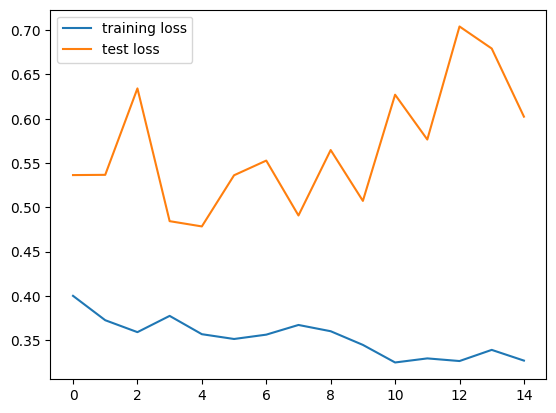

In [49]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()

#Evaluasi Model

In [50]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3866 - accuracy: 0.8200


[0.38660794496536255, 0.8199999928474426]

In [51]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)
score=f1_score(y_test,y_pred,average='weighted')
print(score)

2/2 [==============================] - 0s 7ms/step
0.8526315789473684


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Fungsi untuk menampilkan evaluasi parametrik
def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        45
           1       0.36      1.00      0.53         5

    accuracy                           0.82        50
   macro avg       0.68      0.90      0.71        50
weighted avg       0.94      0.82      0.85        50

--------------------------------------------------------------------------


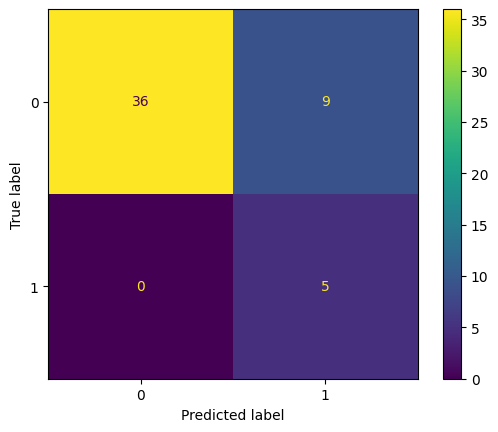

In [53]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

#Save Model

In [54]:
model.save('model.h5')